# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Downlaod Files:

* https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [199]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Import Classification models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
#Read dataset
data = pd.read_csv(r"C:\Users\singh\Downloads\avocado.csv\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


* Column Unnamed is just a reflection of the index so it's a unnecessary column will remove it while doing preprocessing steps.

In [3]:
#Checking last 5 rows of the dataset
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
#Checking number of rows and columns
data.shape

(18249, 14)

In [5]:
#Checking columns of the dataset
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
#Checking index datatype and memory information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


* No missing values, all 18248 rows and 14 columns contains data.
* Column Date, type and region contains object type data and rest all features have data in numbers.

In [7]:
#Checking statistics of the dataset
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* Can see multiple outliers in XLarge Bags.
* I can observe that for some columns the difference between mean and 50% is huge.

In [8]:
#Checking for null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* Data is pretty clean no null values present in the dataset which is great!

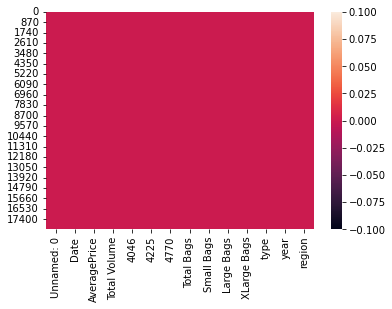

In [9]:
#Checking null values using heatmap
sns.heatmap(data.isnull())
plt.show()

* No missing values.

In [10]:
#Checking unique value of column date
data['Date'].nunique()

169

In [11]:
#Checking unique value of column region
data['region'].nunique()

54

In [12]:
#Checking skewness of the dataset
data.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

* I can see some features are highly skewewd in later process will treat those outliers.

In [13]:
#Will split Date and Year columns into date/month/year columns
data['Year'], data['month'], data['day'] = data['Date'].str.split('-').str

In [14]:
#Adding splited data in the dataset
data['Year'] = data['Year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [15]:
#Droping Year and Date columns
data.drop(['year', 'Date'], axis = 1, inplace = True)

In [16]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [17]:
data.shape

(18249, 15)

In [18]:
#Droping unnamed column
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
data.shape

(18249, 14)

In [20]:
#Checking uniques of Year
data['Year'].unique()

array([2015, 2016, 2017, 2018])

* We have 4 year Avacado data present in this dataset from year 2015 to 2018.

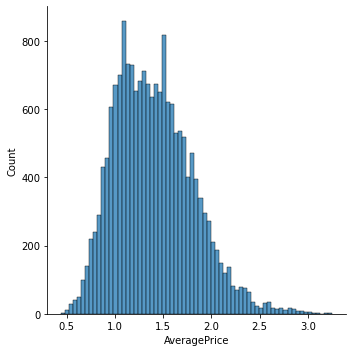

In [21]:
#Checking distribution of Average price
sns.displot(data['AveragePrice'])
plt.show()

* Feature Average price is slightly right skewed, and seeing 2 bumps near mean value.

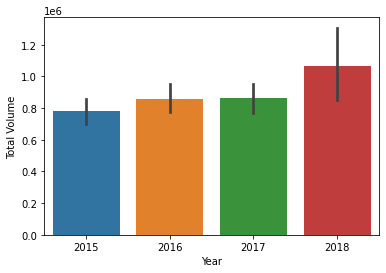

In [22]:
#Visulizing Year vs Total Volume
sns.barplot(y = 'Total Volume', x = 'Year', data = data)
plt.show()

In [23]:
#Checking sum of the sales for each year
data.groupby('Year')['Total Volume'].sum()

Year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

* Year 2018 contains the highest volume followed by 2017, 2016 and 2015.
* Avacado sales have been increased in every year, however in the year of 2016 and 2017 the sales were almost same.

In [24]:
#Checking unique value of Average Price
data['AveragePrice'].nunique()

259

In [25]:
#Find average price by type of avacado
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

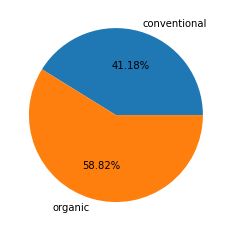

In [26]:
#Visualizing type of avacado's Average price
plt.pie(data.groupby('type')['AveragePrice'].mean().values, labels = data.groupby('type')['AveragePrice'].mean().index, autopct = '%1.2f%%')
plt.show()

* Organic Avacado's price are comparitively higher than the conventional ones.

In [27]:
#Checking sale by type of avacados
data.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

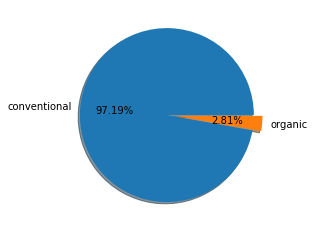

In [28]:
#Visualizing which avacado has higher sales
plt.pie(data.groupby('type')['Total Volume'].mean().values, labels = data.groupby('type')['Total Volume'].mean().index, autopct = '%1.2f%%', explode = [0, 0.1], shadow = True)
plt.show()

* It is clearly visible that conventional avacados are sold more than the Organics ones as the price of Organic avacados are comparitively high.

In [29]:
#Checking types of Avacados
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

<Figure size 1080x720 with 0 Axes>

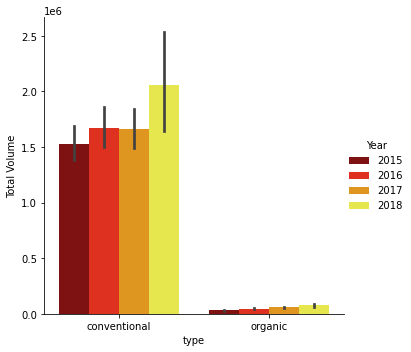

In [30]:
#Visulaizing total sales by year by type
plt.figure(figsize = (15,10))
sns.catplot(x = "type", y = "Total Volume", hue = "Year", kind = "bar", data = data, palette = "hot")
plt.show()

* Again we can see that, in every year conventional avacado's sales are higher than organic avacados.
* And with every year avacado sales have been increased.

In [31]:
#Checking region, avacado's type and average price
data.groupby(['region', 'type'])['AveragePrice'].mean().head(10)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
Name: AveragePrice, dtype: float64

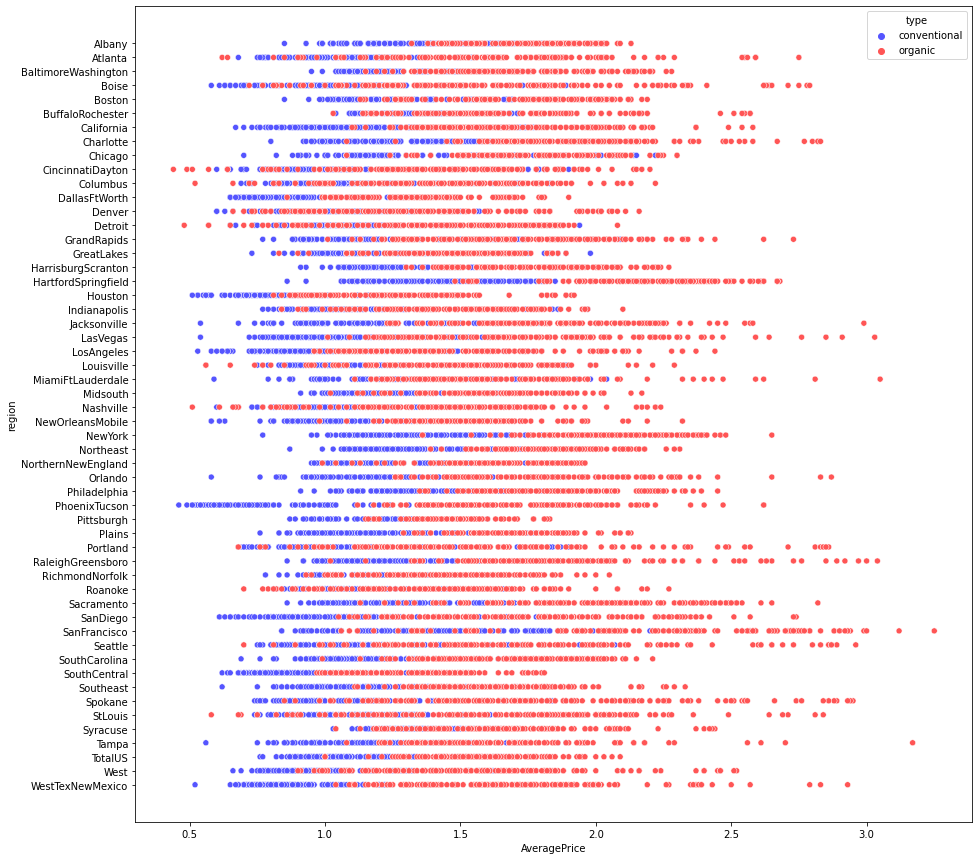

In [32]:
#Visualizing region, avacado's type and average price
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'AveragePrice', y = 'region', hue = 'type', data = data, palette = 'seismic')
plt.show()

* In SanDiego region the average price of organic avacaos are the highest.

In [33]:
#Checking average price of avacado's by year
data.groupby('Year')['AveragePrice'].mean()

Year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

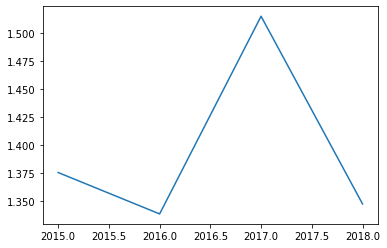

In [34]:
#Visualizing average price of avacado's by year
plt.plot(data.groupby('Year')['AveragePrice'].mean().index, data.groupby('Year')['AveragePrice'].mean().values)
plt.show()

* It seems average price of avacado was higher in the year of 2017.

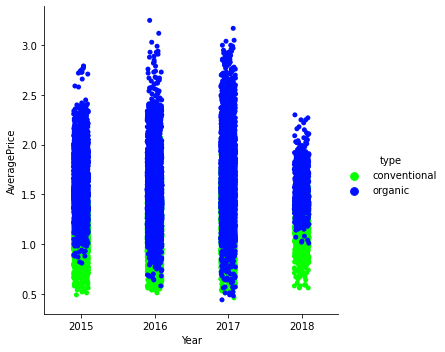

In [35]:
#Visualizing average price by year and type of avacados
sns.catplot(x = 'Year', y = 'AveragePrice', hue = 'type', data = data, palette = 'hsv')
plt.show()

* Average price of organics avacados was always high.

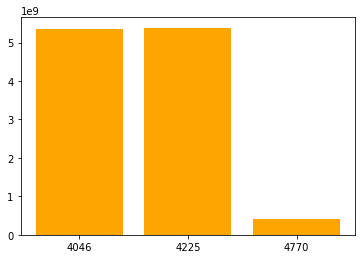

In [36]:
#Checking category wise avacado
plt.bar(['4046', '4225', '4770'], [data['4046'].sum(), data['4225'].sum(), data['4770'].sum()], color = 'orange')
plt.show()

In [37]:
#Printing sum of categories
a = data['4046'].sum()
b = data['4225'].sum()
c = data['4770'].sum()

print('Sum of 4046: ',a)
print('Sum of 4225: ',b)
print('Sum of 4770: ',c)

Sum of 4046:  5347110739.26
Sum of 4225:  5386275717.93
Sum of 4770:  416802342.12999994


* Type PLU 4225 are sold more followed by 4046.
* PLU 4770 types are the least sold.

In [38]:
#Checking avarage price by month
data.groupby('month')['AveragePrice'].mean().sort_values()

month
2     1.274387
1     1.311019
12    1.331112
3     1.332255
5     1.346601
4     1.374380
6     1.408964
11    1.455563
7     1.462077
8     1.512514
9     1.572654
10    1.579683
Name: AveragePrice, dtype: float64

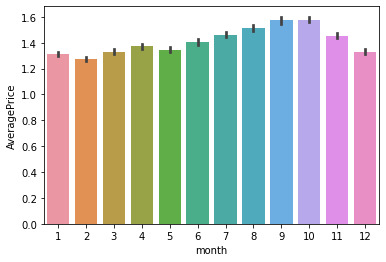

In [39]:
#Visualizing average price by month.
sns.barplot('month', 'AveragePrice', data = data)
plt.show()

* The highest average price avacados were in the moth of September and October.

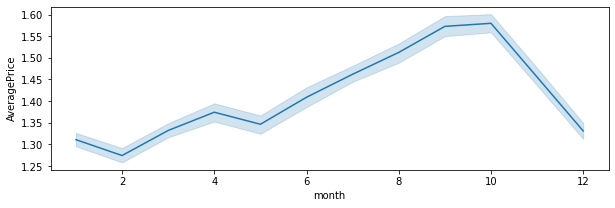

In [40]:
#Visualizing again average price and month.
plt.figure(figsize = (10,3))
sns.lineplot('month', 'AveragePrice', data = data)
plt.show()

* Average price started increasing from July month and in Novenmber and December the price were low.

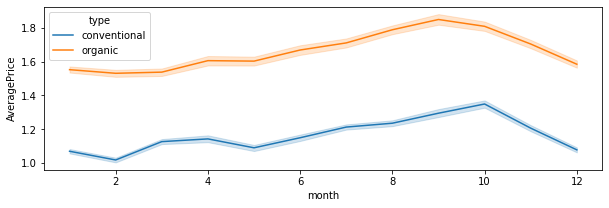

In [41]:
#Visualizing again average price by month and type.
plt.figure(figsize = (10,3))
sns.lineplot('month', 'AveragePrice', hue = 'type', data = data)
plt.show()

* Prices were high for both type of avacados for the month of September, October and November.

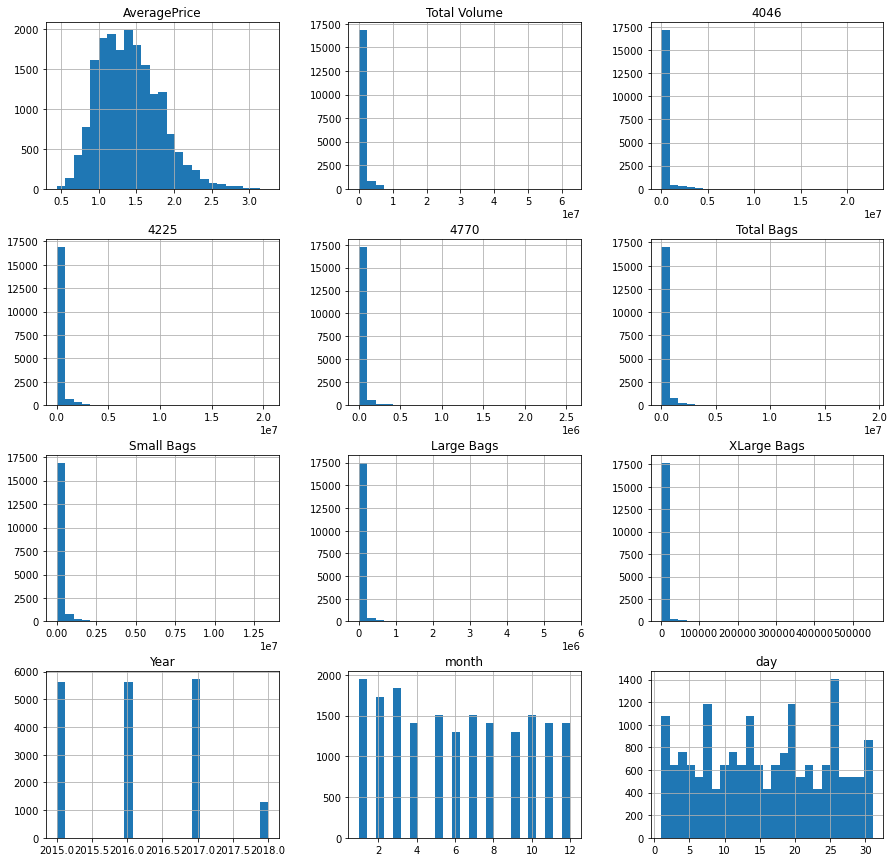

In [42]:
#Ploting histogram 
data.hist(figsize = (15,15), bins = 25)
plt.show()

In [43]:
#Willc check if total bags is the sum of Small, large and xlarge bags
print('Sum of Total Bags: ',data['Total Bags'].sum())
print('Sum of Small Bags, Large Bags and Xlarge Bags', data['Small Bags'].sum()+data['Large Bags'].sum()+data['XLarge Bags'].sum())

Sum of Total Bags:  4373175798.389999
Sum of Small Bags, Large Bags and Xlarge Bags 4373175785.39


In [44]:
#Droping Total Bags column as it is not needed.
data.drop(['Total Bags'], axis = 1, inplace = True)

In [45]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [46]:
#Converting categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [47]:
#Converting string data to numerical values
data['type'] = lab_enc.fit_transform(data['type'].values.reshape(-1,1))
data['region'] = lab_enc.fit_transform(data['region'].values.reshape(-1,1))

In [48]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,2015,11,29


In [49]:
data['type'].unique()

array([0, 1])

In [50]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

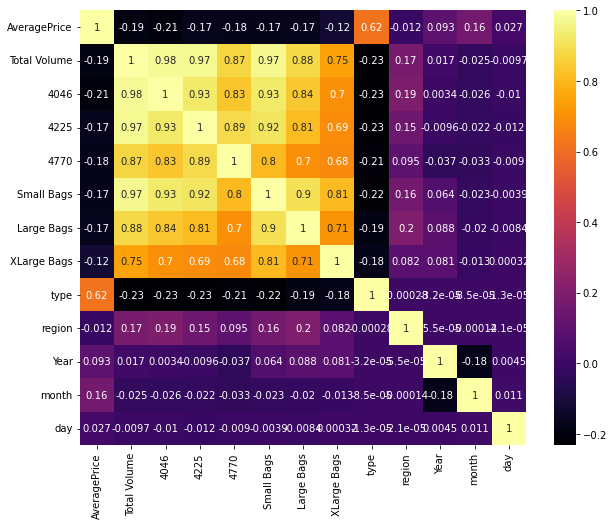

In [51]:
#Checking feature correlation using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap = 'inferno', annot = True)
plt.show()

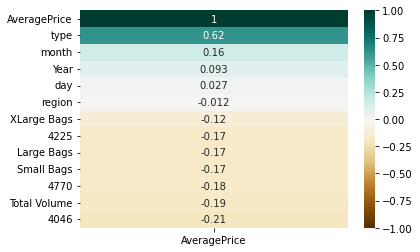

In [52]:
#Checking feature relationship with target Average Price
sns.heatmap(data.corr()[['AveragePrice']].sort_values(by = 'AveragePrice', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
plt.show()

* Almost all the features have negative relationship with target AveragePrice and type column has good relationship with target.

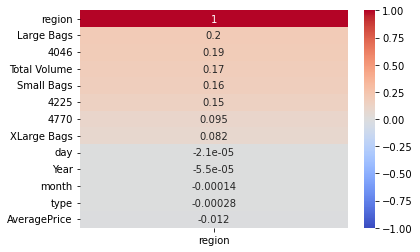

In [53]:
#Checking feature relationship with target Average Price
sns.heatmap(data.corr()[['region']].sort_values(by = 'region', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
plt.show()

* No feature has strong relation with target region.

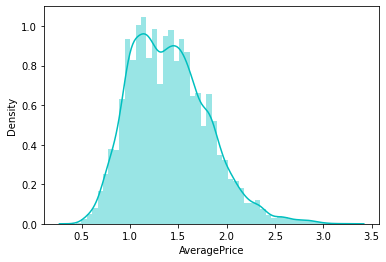

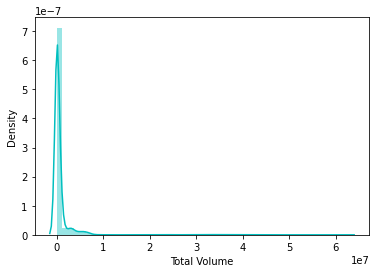

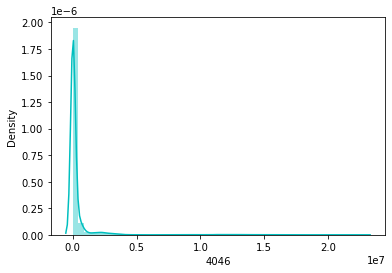

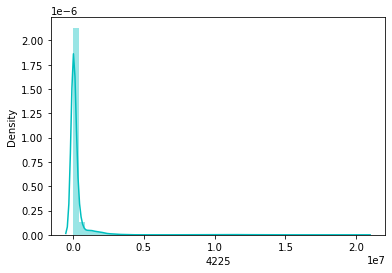

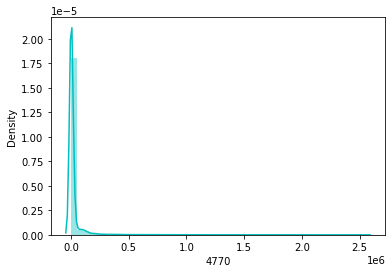

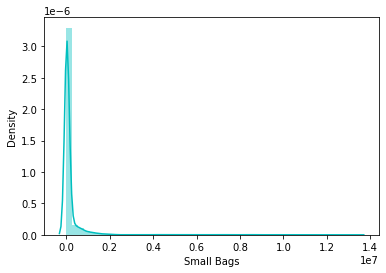

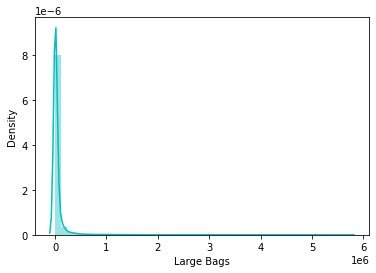

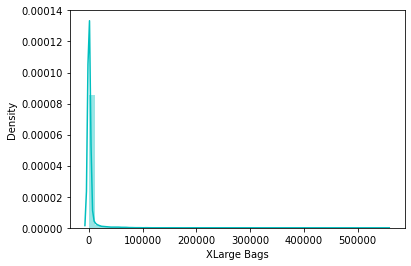

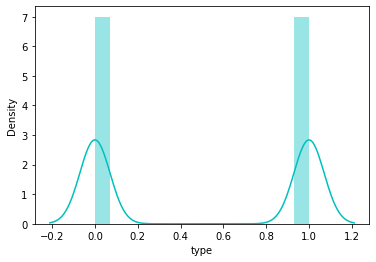

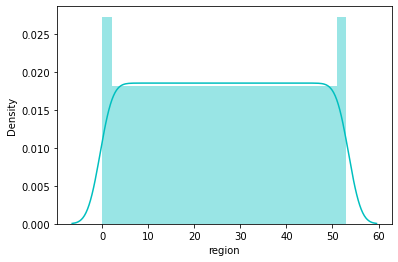

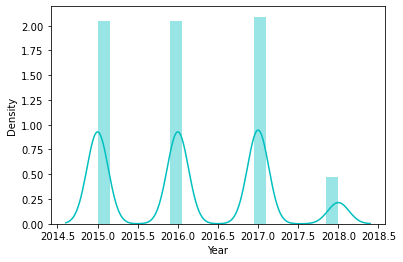

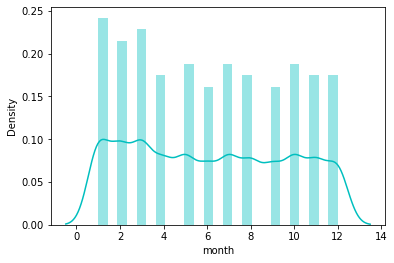

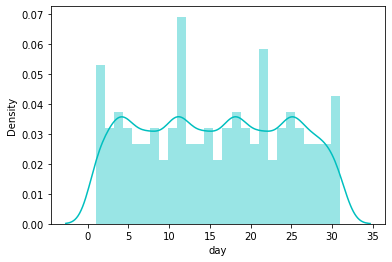

In [54]:
#Checking data distribution.
for i in data.columns:
    plt.figure()
    sns.distplot(data[i], color = 'c')
    
plt.show()

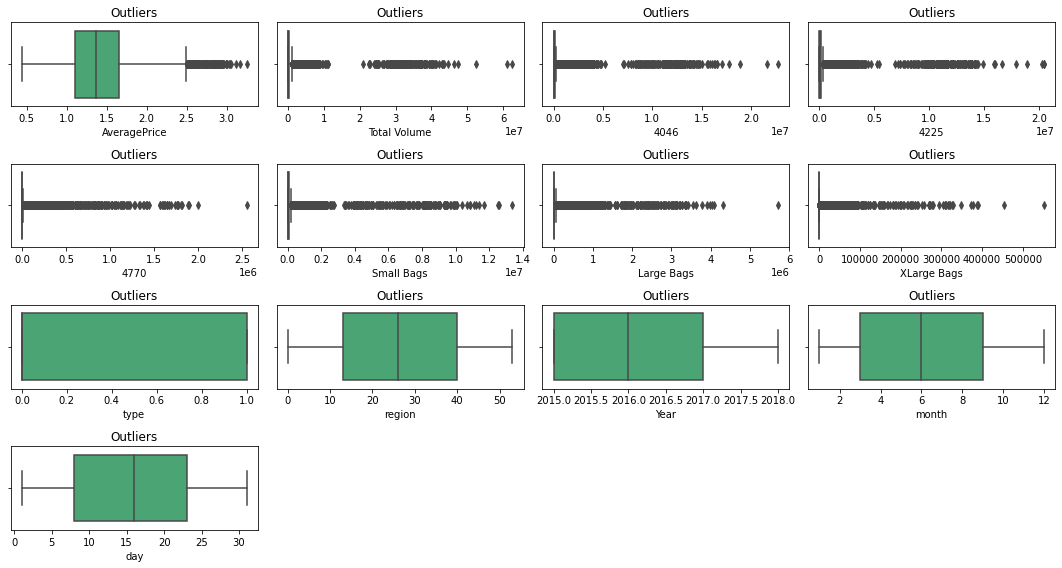

In [55]:
#Check for outliers using box plot
plt.figure(figsize = (15,8))
plotnumber = 1

for column in data:
    if plotnumber <= 16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column], color = 'mediumseagreen')
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout()

* All features have Outliers excluding type, region, year, month, day.

In [56]:
#Using z score to remove outlier
from scipy.stats import zscore
z = zscore(data)
z

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.226665,-0.220964,-0.17558,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.232196,-0.221403,-0.17558,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.231644,-0.222561,-0.17558,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.17558,1.000164,1.700811,1.970504,-1.464959,-0.189449


In [57]:
new_data = data[(z < 3).all(axis = 1)]
new_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,2015,11,29


In [58]:
#Checking skewness
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
Year             0.215339
month            0.106617
day              0.014310
dtype: float64

In [59]:
#Checking skewness for new data
new_data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
month           0.107408
day             0.011778
dtype: float64

* Skewness have been reduced by numbers still some skewness are present in the dataset will try to reduce them in the further process.

In [60]:
#Removing skewness using np.log methods
for col in new_data.columns:
    if new_data.skew().loc[col] > 0.55:
        new_data[col] = np.log1p(new_data[col])

In [61]:
new_data.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
region          0.012798
Year            0.229976
month           0.107408
day             0.011778
dtype: float64

In [62]:
new_data.shape

(17651, 13)

In [63]:
data.shape

(18249, 13)

In [64]:
#Printing data loss
data_loss = (18249 - 17651)/18249 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  3.276891884486821


# Spliting data into X and Y variable for Regression Problem where target is Average Price

In [65]:
x = new_data.drop(columns = 'AveragePrice')
y = new_data['AveragePrice']

In [66]:
x.shape

(17651, 12)

In [67]:
y.shape

(17651,)

# Scaling data

In [68]:
#Importing Standrd Scaler
from sklearn.preprocessing import StandardScaler

#Assigning standrd scaler into a variable
sc = StandardScaler()

#Scaling x data
scaled = sc.fit_transform(x)

# Checking for multicollinearity problem using VIF

In [69]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

In [71]:
#Let's check values
vif

,vif,features
0,26.105883,Total Volume
1,5.217890,4046
2,7.154176,4225
3,3.947620,4770
4,5.692399,Small Bags
5,1.921782,Large Bags
6,1.886526,XLarge Bags
7,3.446237,type
8,1.076424,region
9,1.350995,Year


* Total Volume VIF is higher than value 5 hence will remove Total Volume feature and check VIF again.

In [72]:
#Droping Total Volume column
x = x.drop(columns = ['Total Volume'])

#Scaling x data after removing column ER
scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,3.236721,4046
1,3.425536,4225
2,3.947438,4770
3,3.098282,Small Bags
4,1.728468,Large Bags
5,1.877390,XLarge Bags
6,3.366776,type
7,1.075651,region
8,1.349925,Year
9,1.050121,month


* Multicollinearity problem has been resolved.

# Using Power Transformation to remove some skewness

In [73]:
#Import power transform
from sklearn.preprocessing import power_transform
transform  = power_transform(x)

In [74]:
transformed = pd.DataFrame(transform)
transformed.columns = x.columns

In [75]:
#Checking skewness of dataset after transformation
transformed.skew()

4046          -0.162201
4225          -0.142883
4770          -0.259000
Small Bags    -0.129619
Large Bags    -0.459130
XLarge Bags    0.779549
type          -0.037741
region        -0.257799
Year           0.227731
month         -0.146554
day           -0.208926
dtype: float64

* Skewness have been removed from the dataset very well.

# Data Standardization

In [76]:
scaled = sc.fit_transform(transformed)

# Spliting data into train/test and Regression Model Building

In [77]:
#Import train test split
from sklearn.model_selection import train_test_split

In [79]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  9 The model performance very well
At random state:  9
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  15 The model performance very well
At random state:  15
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  24 The model performance very well
At random state:  24
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  25 The model performance very well
At random state:  25
Test R2 score is:  0.52
Train R2 score is:  0.52
XXXXXXXXX

In [80]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(scaled , y,random_state = 7,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [81]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [83]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, transform, y, cv = 10, scoring = 'neg_mean_squared_error').mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 0.21125090966634405
MSE of LinearRegression() model 0.07202287641470222
RMSE of LinearRegression() model 0.26837078159647376
Training R2 Score of LinearRegression() model 51.42491735552033
Test R2 Score of LinearRegression() model 52.19564639560744
cross Validation score of  LinearRegression()  is  -0.07820659438437635
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 0.2112500330708078
MSE of Ridge() model 0.07202287930599653
RMSE of Ridge() model 0.26837078698322686
Training R2 Score of Ridge() model 51.42491596480042
Test R2 Score of Ridge() model 52.19564447654419
cross Validation score of  Ridge()  is  -0.07820570546503551
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 0.3155753153172668
MSE of Lasso() model 0.15069935730010922
RMSE of Lasso() model 0.3882001510820278
Training R2 Score of Lasso() model 0.0
Test R2 Score of Lasso() model -0.024960442409249772
cross Validation score of  Lasso()  

MAE of  AdaBoostRegressor() model 0.20839907793145163
MSE of AdaBoostRegressor() model 0.06741273743311854
RMSE of AdaBoostRegressor() model 0.2596396299356447
Training R2 Score of AdaBoostRegressor() model 55.3233105046846
Test R2 Score of AdaBoostRegressor() model 55.25557297743489
cross Validation score of  AdaBoostRegressor()  is  -0.07536915623080928
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 0.15053413506672828
MSE of GradientBoostingRegressor() model 0.038659563848112574
RMSE of GradientBoostingRegressor() model 0.1966203546129255
Training R2 Score of GradientBoostingRegressor() model 75.27859643885736
Test R2 Score of GradientBoostingRegressor() model 74.34016034370008
cross Validation score of  GradientBoostingRegressor()  is  -0.05081897687130271
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




# XGB Regressor is giving the best score so far will use Hyper Parameter tuning method and will try to improve the model.

In [84]:
params = {'n_estimators': [100, 200, 300],
        'gamma': [2.0, 3.0, 4.0],
         'max_depth': [4 , 6, 8],
         'learning_rate':[0.01, 0.05, 0.1]
        }

GCV = GridSearchCV(XGB_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_ca...t=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [2.0, 3.0, 4.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [85]:
GCV.best_params_

{'gamma': 2.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [86]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.7829814553930303

# Accuracy decreased by will use the original model to predict Average Price.

In [87]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(XGB_model, open('XGB_model1', 'wb'))

In [88]:
#Loading saved model
loaded_model = pickle.load(open('XGB_model1','rb'))

In [89]:
#Prediction using saved model
Average_price = loaded_model.predict(x_test)
Average_price

array([1.3649995 , 1.1511235 , 1.1494622 , ..., 1.5063457 , 0.84409446,
       1.4759032 ], dtype=float32)

In [90]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Average Price': y_test, 'Predicted Average Price': Average_price})
DF.head()

,Actual Average Price,Predicted Average Price
16217,1.33,1.365000
8967,1.15,1.151124
6259,1.03,1.149462
11261,1.83,1.831766
13678,1.52,1.671905


# Visualizing Error Residual

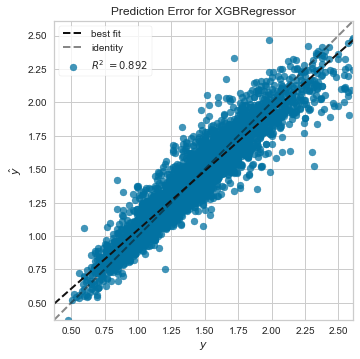

In [91]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(XGB_model)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

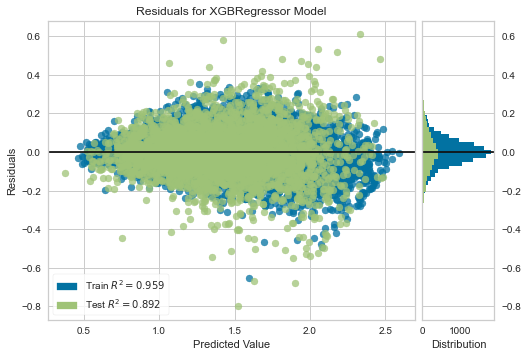

In [92]:
#Residual for Linear model
visualizer = ResidualsPlot(XGB_model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()

# Prediction with Region

In [152]:
Df = pd.read_csv(r"C:\Users\singh\Downloads\avocado.csv\avocado.csv")
Df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [153]:
#Droping Unnamed column
Df.drop('Unnamed: 0', axis = 1, inplace = True)

In [154]:
#Will split Date and Year columns into date/month/year columns
Df['Year'], Df['month'], Df['day'] = Df['Date'].str.split('-').str

#Adding splited data in the dataset
Df['Year'] = Df['Year'].astype(int)
Df['month'] = Df['month'].astype(int)
Df['day'] = Df['day'].astype(int)

#Droping Year and Date columns
Df.drop(['year', 'Date'], axis = 1, inplace = True)

In [155]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,2015,11,29


In [156]:
Df['region'].nunique()

54

In [157]:
num = Df.select_dtypes(np.number)
num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


In [158]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
month            0.106617
day              0.014310
dtype: float64

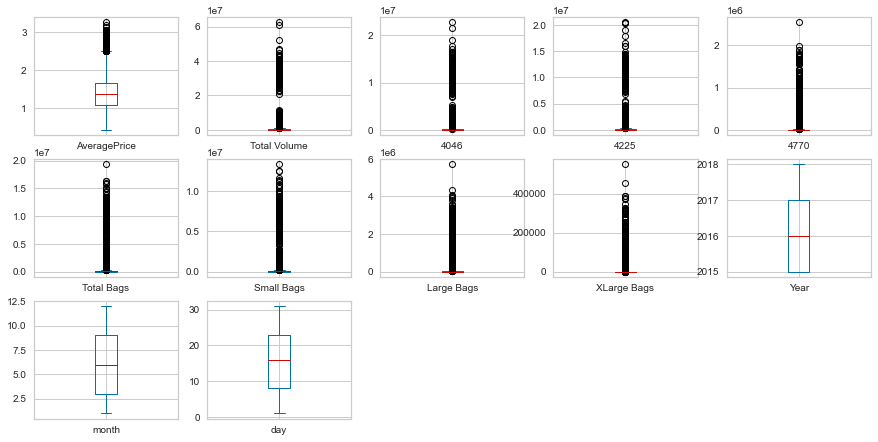

In [159]:
Df.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15,10))
plt.show()

In [160]:
#Calculate Z score
z = np.abs(zscore(num))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.970504,1.464959,0.189449


In [161]:
threshold = 3
print(np.where(z < 3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 12)


In [162]:
#Assign the value to new_Df which are less than threshold 
new_Df = Df[(z < 3).all(axis = 1)]

In [164]:
new_Df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [168]:
#Removed data
Df.shape[0] - new_Df.shape[0]

598

In [169]:
new_Df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
Year            0.229976
month           0.107408
day             0.011778
dtype: float64

In [170]:
num1 = new_Df.select_dtypes(np.number)
num1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


# Transformation to remove skewness

In [171]:
#Transforming data
Transform = power_transform(num1)

In [172]:
Transformed = pd.DataFrame(Transform)
Transformed.columns = num1.columns

In [173]:
Transformed

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383,1.227565
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383,0.538229
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383,-0.218959
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210647,1.491383,-1.094426
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210647,1.276081,1.415364
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978707,-1.218907,-1.384767
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978707,-1.640288,1.321911
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978707,-1.640288,0.640195
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978707,-1.640288,-0.105299


In [174]:
Transformed.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
Year            0.227731
month          -0.146554
day            -0.208926
dtype: float64

* Skewness have been removed.

# PCA to remove curse of dimentionality

In [175]:
#Scaling data
scaled1 = sc.fit_transform(Transformed)

In [176]:
scaled1 = pd.DataFrame(scaled1)
scaled1.columns = Transformed.columns

In [177]:
scaled1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,1.491383,1.227565
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,1.491383,0.538229
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,1.491383,-0.218959
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,1.491383,-1.094426
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,1.276081,1.415364
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,-1.218907,-1.384767
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,-1.640288,1.321911
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,-1.640288,0.640195
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,-1.640288,-0.105299


In [178]:
#Import PCA
from sklearn.decomposition import PCA
pca = PCA()

In [179]:
principle_comp = pca.fit_transform(scaled1)

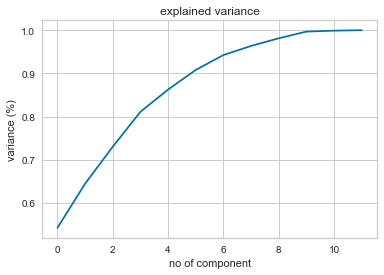

In [180]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 9 components has explained 98% - 99% variance of all features, so will use 9.

In [182]:
pca = PCA(n_components = 9)

In [183]:
Df1 = pca.fit_transform(scaled1)
principle_x = pd.DataFrame(Df1, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
principle_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.997089,-1.920357,-1.086949,-0.608959,0.174846,0.206343,0.456677,0.449175,-0.293467
1,-1.060646,-1.901706,-0.604394,-0.118556,0.138019,0.197106,0.420432,0.550580,-0.344988
2,-0.440614,-2.071643,0.386668,-0.036819,0.638264,-0.174058,0.799961,0.880372,-0.219816
3,-0.792596,-2.026339,0.896585,0.685722,0.482310,-0.079297,0.523777,0.614614,-0.119296
4,-1.059613,-1.804920,-1.060404,-0.916636,0.302553,0.112072,0.272902,0.536727,-0.150138
...,...,...,...,...,...,...,...,...,...
17646,-1.713688,2.472315,0.925425,1.088408,0.002767,0.287893,0.470299,-0.368770,0.024631
17647,-1.901069,2.708458,-0.920813,-0.918508,-0.207833,0.374885,0.273574,-0.286517,-0.022684
17648,-1.591234,2.442787,-0.479717,-0.449479,-1.142644,0.400119,0.244189,0.710851,0.907769
17649,-1.488959,2.444590,0.020058,0.102306,-1.244986,0.510383,0.192227,0.639187,0.882804


In [184]:
cat = pd.get_dummies(new_Df['type'])

In [185]:
principle_x.shape, cat.shape

((17651, 9), (17651, 2))

In [186]:
pd.concat([principle_x, cat], axis = 1, join = 'inner')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,conventional,organic
0,-0.997089,-1.920357,-1.086949,-0.608959,0.174846,0.206343,0.456677,0.449175,-0.293467,1,0
1,-1.060646,-1.901706,-0.604394,-0.118556,0.138019,0.197106,0.420432,0.550580,-0.344988,1,0
2,-0.440614,-2.071643,0.386668,-0.036819,0.638264,-0.174058,0.799961,0.880372,-0.219816,1,0
3,-0.792596,-2.026339,0.896585,0.685722,0.482310,-0.079297,0.523777,0.614614,-0.119296,1,0
4,-1.059613,-1.804920,-1.060404,-0.916636,0.302553,0.112072,0.272902,0.536727,-0.150138,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.713688,2.472315,0.925425,1.088408,0.002767,0.287893,0.470299,-0.368770,0.024631,0,1
17647,-1.901069,2.708458,-0.920813,-0.918508,-0.207833,0.374885,0.273574,-0.286517,-0.022684,0,1
17648,-1.591234,2.442787,-0.479717,-0.449479,-1.142644,0.400119,0.244189,0.710851,0.907769,0,1
17649,-1.488959,2.444590,0.020058,0.102306,-1.244986,0.510383,0.192227,0.639187,0.882804,0,1


In [187]:
principle_x['type'] = new_Df['type']

In [188]:
principle_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,type
0,-0.997089,-1.920357,-1.086949,-0.608959,0.174846,0.206343,0.456677,0.449175,-0.293467,conventional
1,-1.060646,-1.901706,-0.604394,-0.118556,0.138019,0.197106,0.420432,0.550580,-0.344988,conventional
2,-0.440614,-2.071643,0.386668,-0.036819,0.638264,-0.174058,0.799961,0.880372,-0.219816,conventional
3,-0.792596,-2.026339,0.896585,0.685722,0.482310,-0.079297,0.523777,0.614614,-0.119296,conventional
4,-1.059613,-1.804920,-1.060404,-0.916636,0.302553,0.112072,0.272902,0.536727,-0.150138,conventional
...,...,...,...,...,...,...,...,...,...,...
17646,-1.713688,2.472315,0.925425,1.088408,0.002767,0.287893,0.470299,-0.368770,0.024631,organic
17647,-1.901069,2.708458,-0.920813,-0.918508,-0.207833,0.374885,0.273574,-0.286517,-0.022684,organic
17648,-1.591234,2.442787,-0.479717,-0.449479,-1.142644,0.400119,0.244189,0.710851,0.907769,organic
17649,-1.488959,2.444590,0.020058,0.102306,-1.244986,0.510383,0.192227,0.639187,0.882804,organic


In [189]:
x = pd.get_dummies(principle_x)

In [190]:
x.shape

(17651, 11)

In [193]:
#Label encoder for target variable
y = lab_enc.fit_transform(new_Df['region'])

In [194]:
y.shape

(17651,)

In [195]:
pd.DataFrame(y, columns = ['region']).value_counts()

region
0         338
16        338
49        338
44        338
39        338
38        338
35        338
34        338
32        338
30        338
26        338
23        338
19        338
18        338
27        338
10        338
2         338
8         338
9         338
5         338
11        338
4         338
12        338
13        338
20        337
1         337
28        337
50        336
33        336
14        336
41        336
40        336
24        335
31        335
21        333
25        333
48        333
7         332
53        332
22        331
17        331
36        330
3         329
37        328
47        328
43        326
29        325
46        307
42        301
45        292
6         290
15        272
52        256
51        169
dtype: int64

In [198]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = i, test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred =  LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.39988671764372696 on Random State = 97


# Accuracy is not satisfying trying different preprocessing technique

In [205]:
new_Df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [206]:
final_data = new_Df.drop(['Total Volume', 'Total Bags'], axis = 1)

In [207]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [208]:
final_data.shape

(17651, 12)

In [209]:
final_data.skew()

AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
Year            0.229976
month           0.107408
day             0.011778
dtype: float64

# Balance Data using SMOTE()

In [210]:
#Import Smote
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [211]:
final_data.drop('region', axis = 1, inplace = True)

In [212]:
data1 = pd.get_dummies(final_data)

In [213]:
Transformed1 = power_transform(data1)

In [214]:
standard = sc.fit_transform(Transformed1)

In [215]:
standard.shape

(17651, 12)

In [216]:
balance_x, balance_y = smt.fit_resample(standard, y)

In [217]:
balance_x.shape, balance_y.shape

((18252, 12), (18252,))

In [219]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(balance_x,balance_y,random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.5330046562585593 on Random State = 29


In [223]:
x_train,x_test,y_train,y_test = train_test_split(balance_x, balance_y, test_size = 0.2, random_state = 29)

In [224]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [225]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 53.30046562585593
Confusion Matrix of  LogisticRegression()  is 
 [[36  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  1  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  4  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.56      0.63      0.60        57
           1       0.27      0.56      0.37        66
           2       0.54      0.64      0.59        53
           3       0.56      0.48      0.52        75
           4       0.49      0.52      0.51        67
           5       0.61      0.42      0.50        66
           6       0.86      0.89      0.87        70
           7       0.60      0.69      0.64        58
           8       0.51      0.67      0.58        63
           9       0.55      0.81      0.65        78
          10       0.67      0.43      0.53        76
          11       0.54      0.51      0.52        73
          12       0.48      0.6

Accuracy_Score of  SVC() is 78.0608052588332
Confusion Matrix of  SVC()  is 
 [[55  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 53 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  1  1 ...  0  0 37]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.77        57
           1       0.50      0.67      0.57        66
           2       0.95      1.00      0.97        53
           3       0.77      0.64      0.70        75
           4       0.88      0.90      0.89        67
           5       0.88      0.67      0.76        66
           6       0.99      1.00      0.99        70
           7       0.79      0.72      0.76        58
           8       0.91      1.00      0.95        63
           9       0.86      0.85      0.85        78
          10       0.57      0.74      0.64        76
          11       0.82      0.79      0.81        73
          12       0.96      1.00      0.98        65
         

Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 88.35935360175294
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_

Accuracy_Score of  BaggingClassifier() is 86.19556285949055
Confusion Matrix of  BaggingClassifier()  is 
 [[49  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  2 ...  0  0 41]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        57
           1       0.75      0.79      0.77        66
           2       0.93      0.94      0.93        53
           3       0.89      0.85      0.87        75
           4       0.88      0.94      0.91        67
           5       0.75      0.85      0.79        66
           6       0.97      0.97      0.97        70
           7       0.88      0.90      0.89        58
           8       0.88      1.00      0.93        63
           9       0.91      0.92      0.92        78
          10       0.81      0.82      0.81        76
          11       0.96      0.95      0.95        73
          12       0.90      0.80 

In [228]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, balance_x, balance_y,cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 53.30046562585593
cross Validation accuracy score of  LogisticRegression()  is  39.984925878817215
**************************************************
Accuracy_Score of  RidgeClassifier() is 22.04875376609148
cross Validation accuracy score of  RidgeClassifier()  is  17.548876457191312
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.90933990687483
cross Validation accuracy score of  DecisionTreeClassifier()  is  58.19043609744751
**************************************************
Accuracy_Score of  SVC() is 78.0608052588332
cross Validation accuracy score of  SVC()  is  60.88589877796664
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 64.03725006847439
cross Validation accuracy score of  KNeighborsClassifier()  is  41.370377791034926
**************************************************
Accuracy_Score of  RandomForestClassifier() is 91.509175568337

* Random Forest Classifier has given the best performance.

# Hyper Tuning Random Forest Classifier

In [237]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [238]:
RFR_model = grd.best_estimator_
RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [239]:
#Model Confidence/Accuracy

def metric_score(RFR_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = RFR_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = RFR_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [240]:
#Call the function and pass dataset to check train and test score.
metric_score(RFR_model,x_train,x_test,y_train,y_test,train = True)
metric_score(RFR_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 96.16%

====================================Test Result================================
Accurancy Score: 87.46%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        57
           1       0.78      0.82      0.80        66
           2       0.91      0.98      0.95        53
           3       0.90      0.85      0.88        75
           4       0.91      0.96      0.93        67
           5       0.88      0.80      0.84        66
           6       0.96      0.99      0.97        70
           7       0.89      0.84      0.87        58
           8       0.91      0.95      0.93        63
           9       0.96      0.94      0.95        78
          10       0.84      0.83      0.83        76
          11       0.99      0.93      0.96        73
          12       0.87      0.92      0.90        65


# I have successfully tuned the model as accuracy have been imroved.

In [242]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('RFR_model', 'wb'))

In [243]:
#Loading saved model
loaded_model = pickle.load(open('RFR_model','rb'))

In [244]:
region = loaded_model.predict(x_test)
region

array([32,  0, 47, ..., 46,  8,  9])

In [248]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
Region = pd.DataFrame({'Actual Region': y_test, 'Predicted Region': region})
Region = Region.style.hide_index()
Region

Actual Region,Predicted Region
32,32
0,0
47,47
7,7
7,7
4,4
32,32
19,19
1,1
29,29


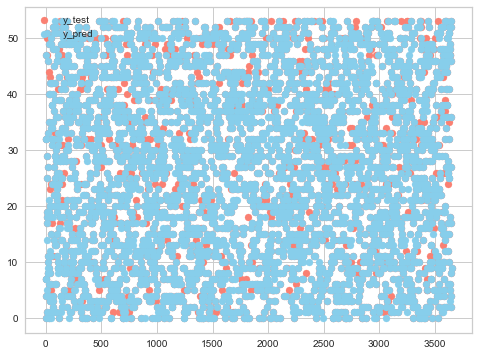

In [249]:
#Visualize Actual vs Predicted Region
fig = plt.figure(figsize = (8,6))
plt.scatter(range(y_test.shape[0]), y_test, color = "salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), region, color = "skyblue", label = "y_pred")
plt.legend();